LINEAR REGRESSION MODEL WITH NEW DATASET 

In [73]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [74]:
data=pd.read_csv('ad_prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [75]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [76]:
data.isnull().count()

Serial No.           400
GRE Score            400
TOEFL Score          400
University Rating    400
SOP                  400
LOR                  400
CGPA                 400
Research             400
Chance of Admit      400
dtype: int64

In [77]:
#data['University Rating']=data['University Rating'].fillna(data['University Rating'].mode()[0])
#data['TOEFL Score']=data['TOEFL Score'].fillna(data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
#data['GRE Score']=data['GRE Score'].fillna(data['GRE Score'].fillna(data['GRE Score'].mean())

data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())


In [78]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


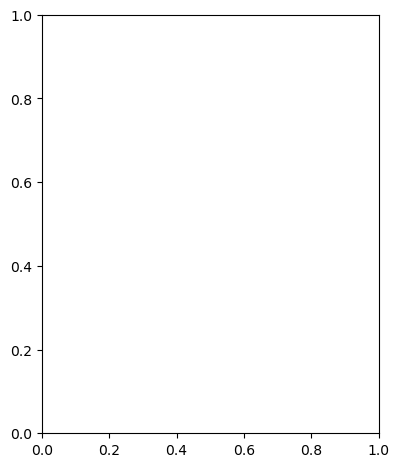

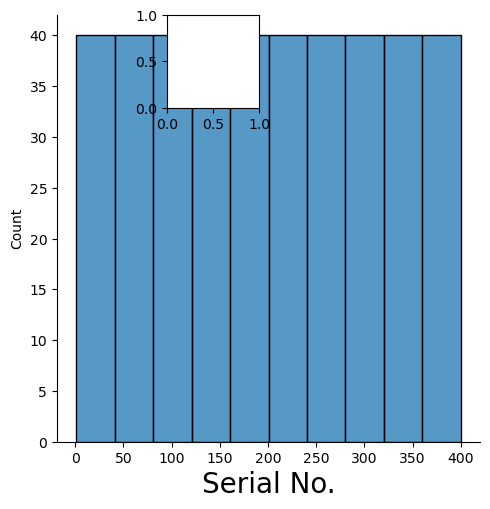

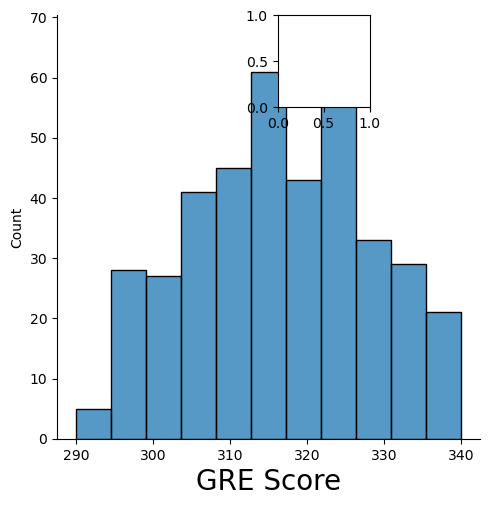

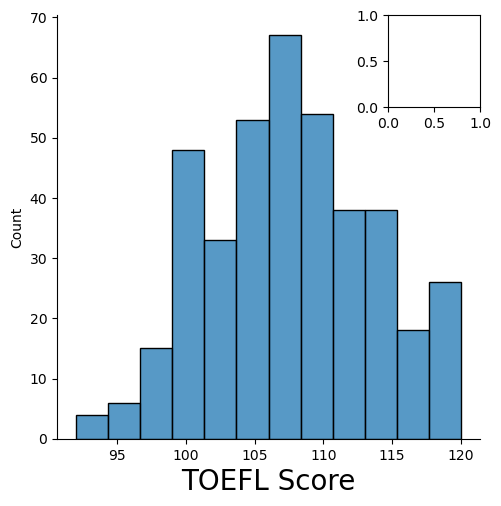

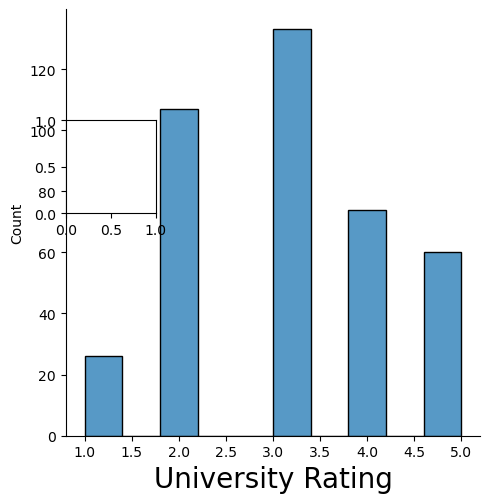

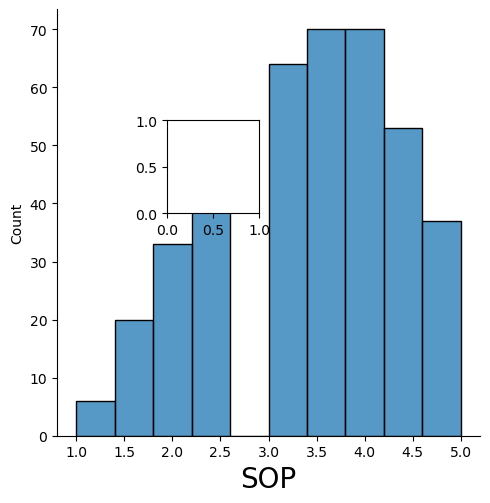

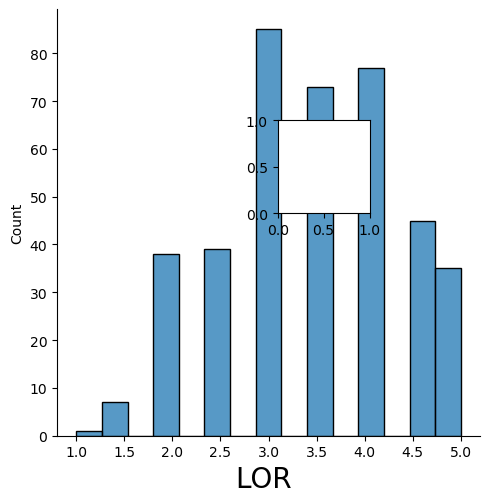

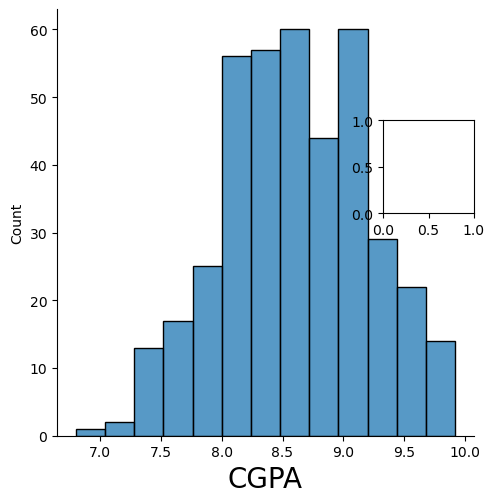

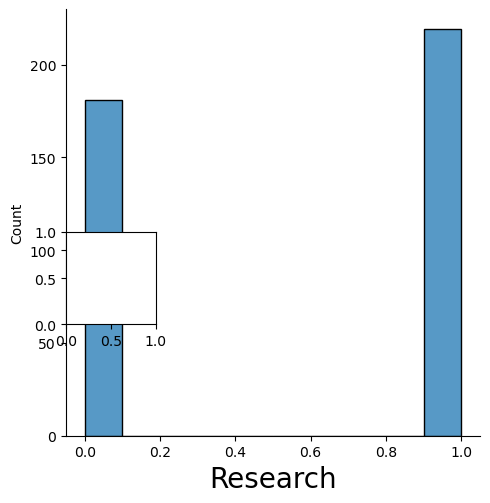

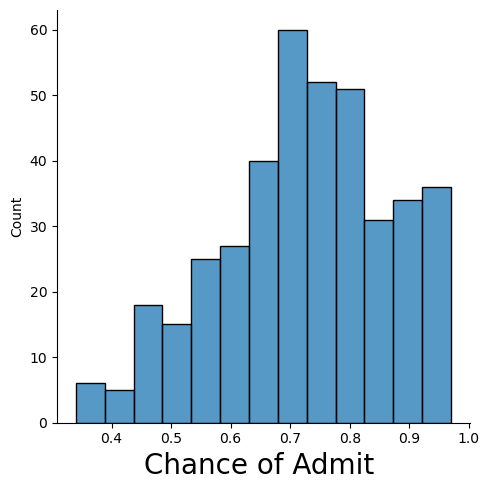

In [79]:
# Let see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.displot(data[column])
        plt.xlabel(column,fontsize=20)

    plotnumber+=1

plt.tight_layout()

In [80]:
#x=data[['Serial No.','GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research']]
#y=data.iloc[:8]
#x=data.drop(columns='Chance of Admit')
data.columns = data.columns.str.strip()
y = data['Chance of Admit']
x = data.drop(columns='Chance of Admit')


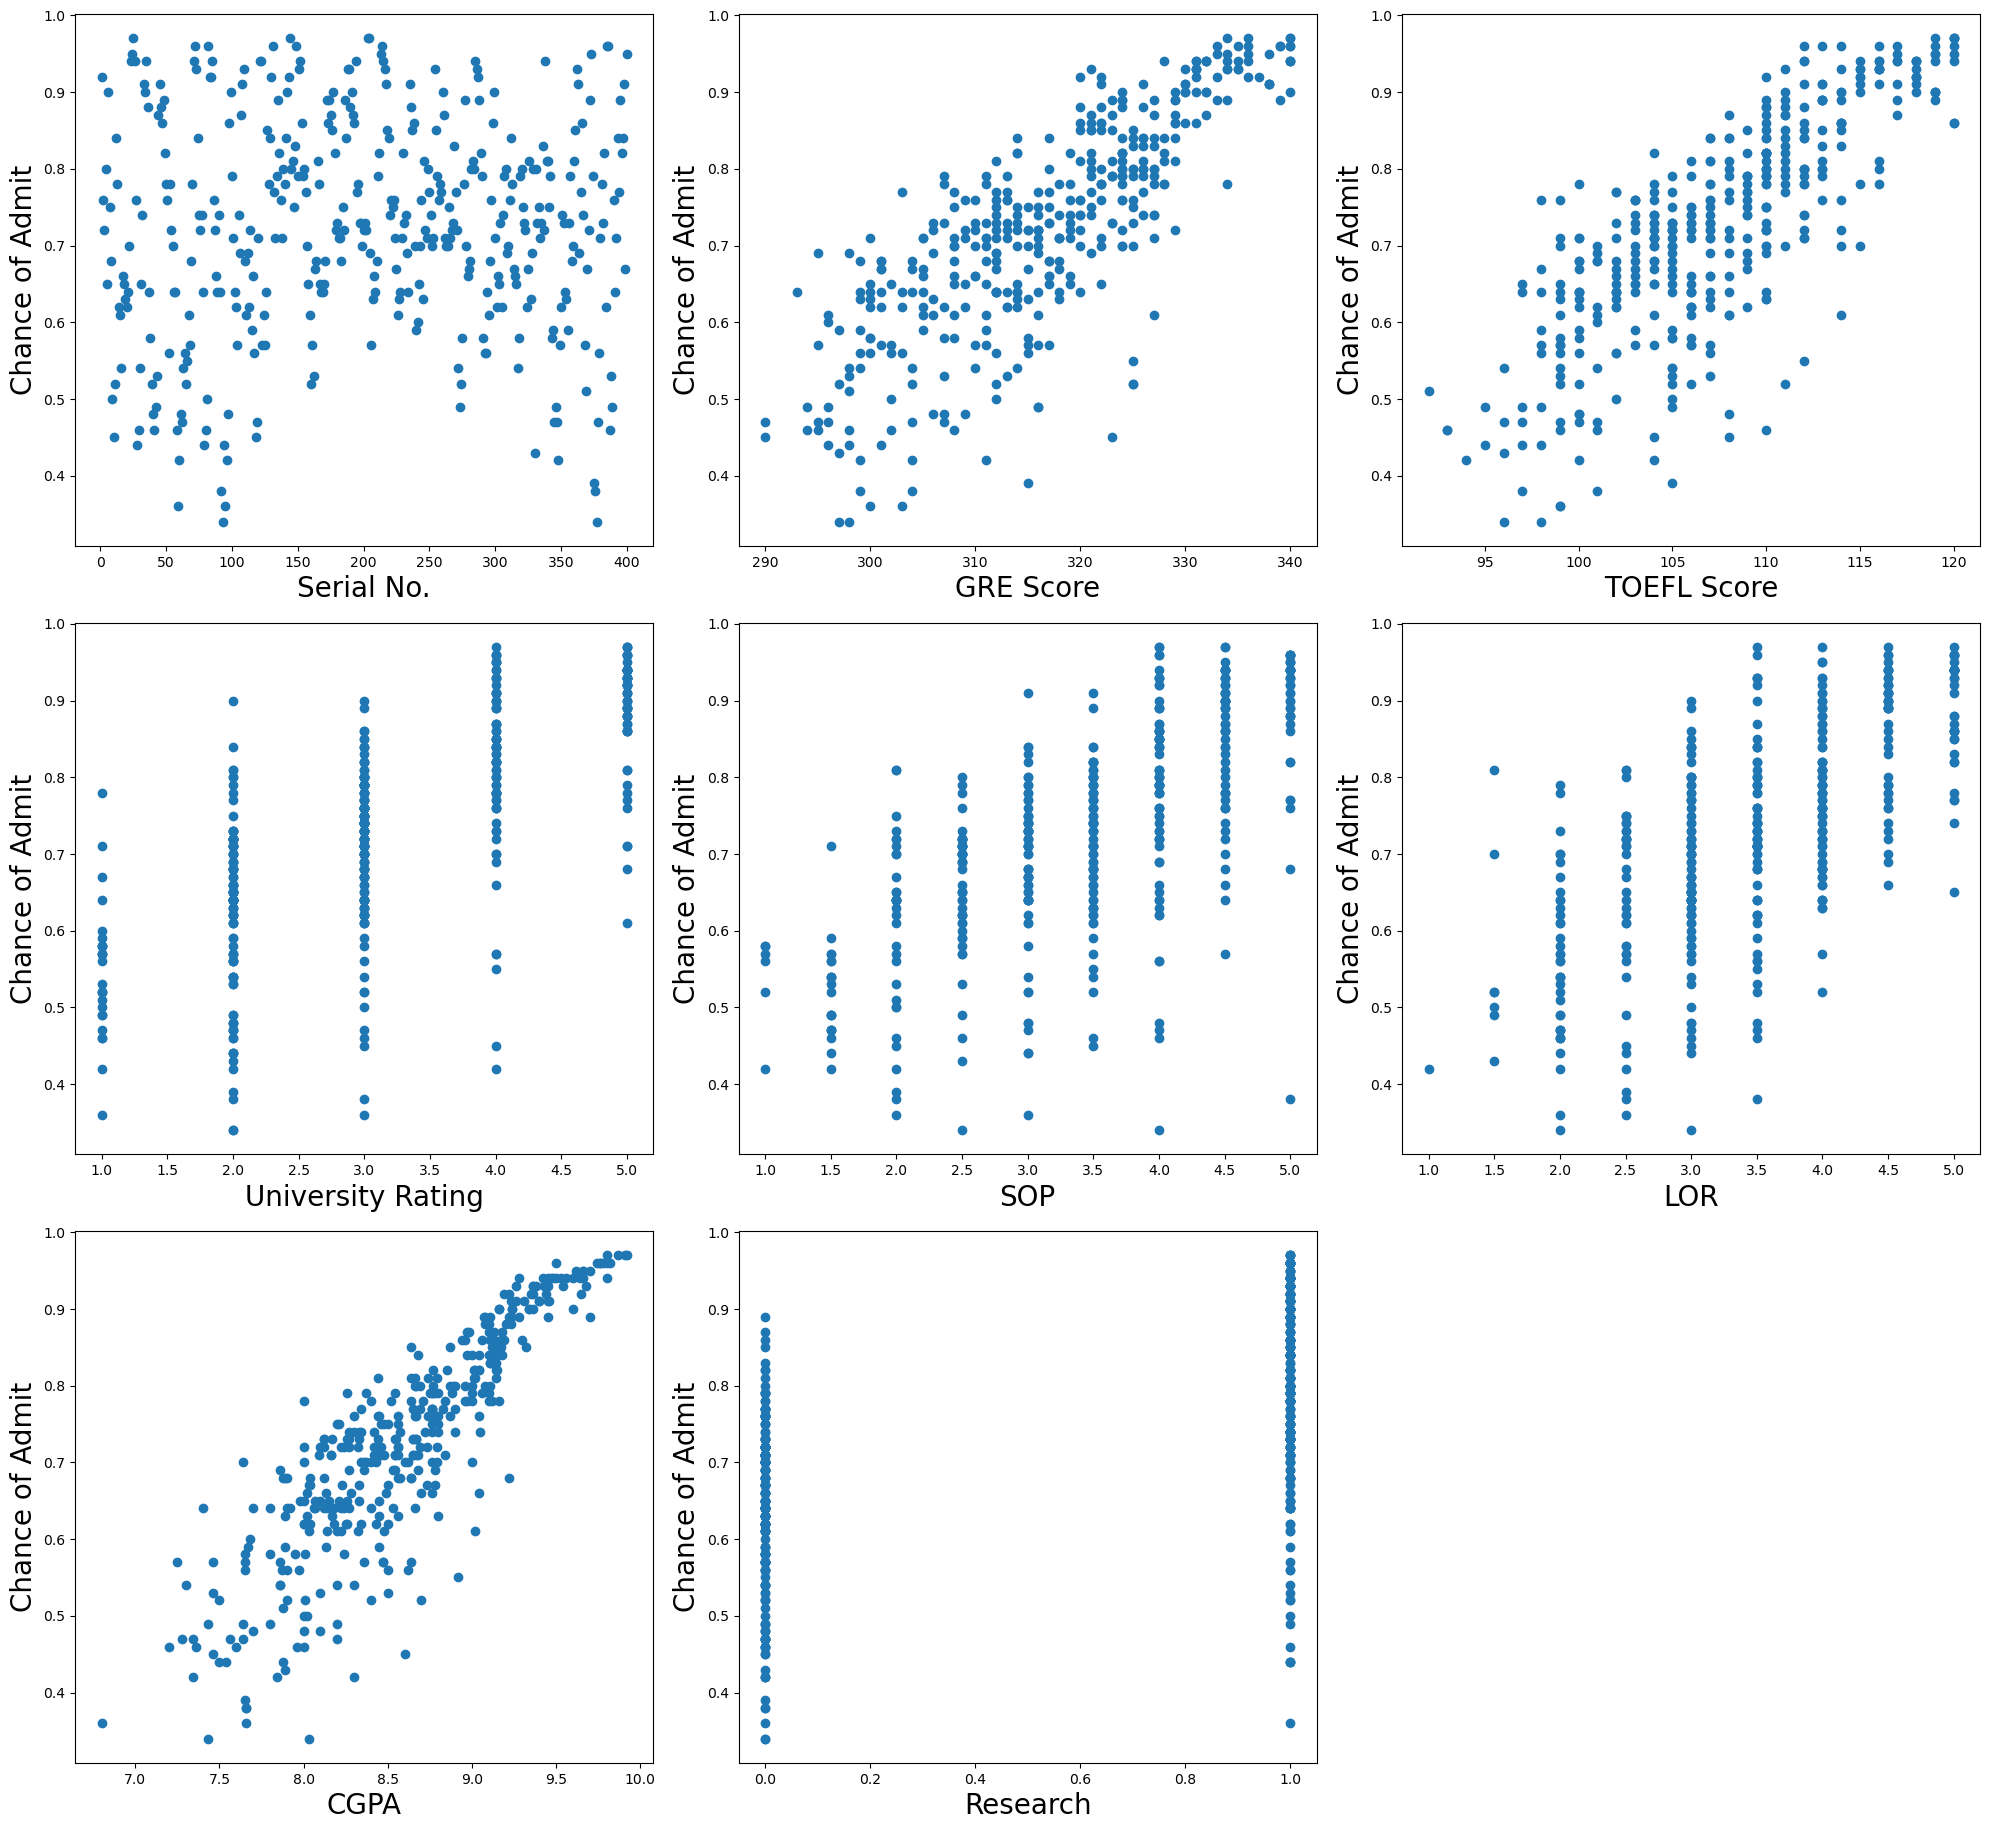

In [81]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)

    plotnumber+=1

plt.tight_layout()

In [82]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [84]:
y_train

93     0.44
222    0.76
350    0.74
332    0.75
282    0.81
       ... 
51     0.56
291    0.56
346    0.47
130    0.96
254    0.85
Name: Chance of Admit, Length: 300, dtype: float64

In [85]:
regression=LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [86]:
regression.score(x_train,y_train)

0.8394622951579456

In [87]:
regression.score(x_test,y_test)

0.7499979773896148

In [88]:
y_pred=regression.predict(x_test)

In [89]:
r2_score(y_test,y_pred)

0.7499979773896148

#sns.pairplot(data)

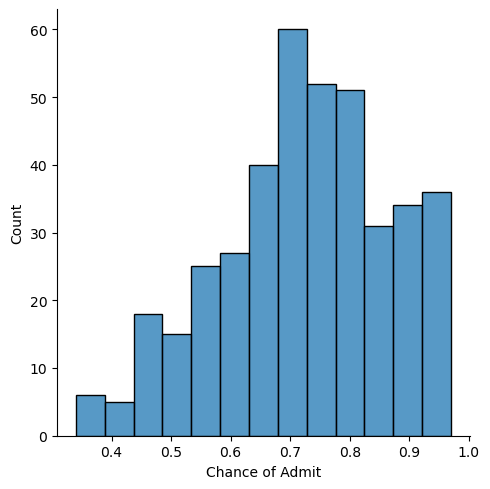

In [93]:
sns.displot(data['Chance of Admit'])

<Axes: >

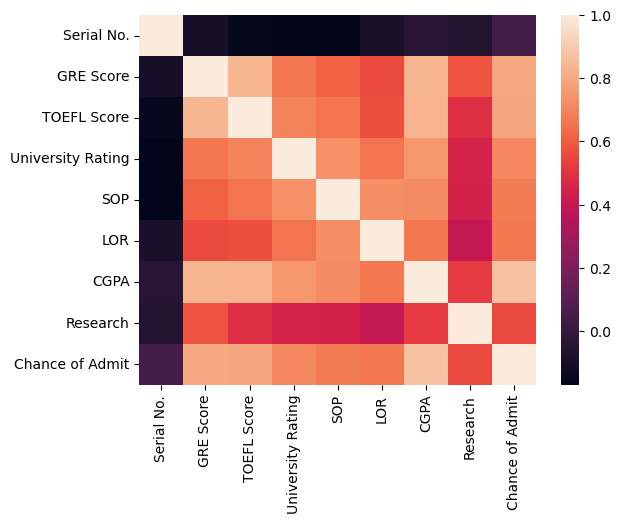

In [95]:
sns.heatmap(data.corr(numeric_only=True))

In [97]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [99]:
data['University Rating'].mode()

0    3
Name: University Rating, dtype: int64

In [100]:
data['University Rating'].std()

1.1437281298838997

In [101]:
help()

Welcome to Python 3.11's help utility! If this is your first time using
Python, you should definitely check out the tutorial at
https://docs.python.org/3.11/tutorial/.

Enter the name of any module, keyword, or topic to get help on writing
Python programs and using Python modules.  To get a list of available
modules, keywords, symbols, or topics, enter "modules", "keywords",
"symbols", or "topics".

Each module also comes with a one-line summary of what it does; to list
the modules whose name or summary contain a given string such as "spam",
enter "modules spam".

To quit this help utility and return to the interpreter,
enter "q" or "quit".



help>  os


Help on module os:

NAME
    os - OS routines for NT or Posix depending on what system we're on.

MODULE REFERENCE
    https://docs.python.org/3.11/library/os.html
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This exports:
      - all functions from posix or nt, e.g. unlink, stat, etc.
      - os.path is either posixpath or ntpath
      - os.name is either 'posix' or 'nt'
      - os.curdir is a string representing the current directory (always '.')
      - os.pardir is a string representing the parent directory (always '..')
      - os.sep is the (or a most common) pathname separator ('/' or '\\')
      - os.extsep is the extension separator (always '.')
      - os.altsep is the alternate pathn

help>  q



You are now leaving help and returning to the Python interpreter.
If you want to ask for help on a particular object directly from the
interpreter, you can type "help(object)".  Executing "help('string')"
has the same effect as typing a particular string at the help> prompt.


In [102]:
import os 

In [103]:
import math 

In [105]:
help()

Welcome to Python 3.11's help utility! If this is your first time using
Python, you should definitely check out the tutorial at
https://docs.python.org/3.11/tutorial/.

Enter the name of any module, keyword, or topic to get help on writing
Python programs and using Python modules.  To get a list of available
modules, keywords, symbols, or topics, enter "modules", "keywords",
"symbols", or "topics".

Each module also comes with a one-line summary of what it does; to list
the modules whose name or summary contain a given string such as "spam",
enter "modules spam".

To quit this help utility and return to the interpreter,
enter "q" or "quit".



help>  modules



Please wait a moment while I gather a list of all available modules...



C:\anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,
C:\anaconda\Lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn(
C:\anaconda\Lib\pkgutil.py:92: UserWarning: The numpy.array_api submodule is still experimental. See NEP 47.
  __import__(info.name)
C:\anaconda\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
No QCoreApplication instance found. Application patches not applied. You have to call load_stylesheet function after instantiation of QApplication to take effect. 


6c7190bc8b55ffe67f57__mypyc commctrl            mdit_py_plugins     smtpd
IPython             compileall          mdurl               smtplib
OpenSSL             concurrent          menuinst            snappy
PIL                 conda               mimetypes           sndhdr
PyQt5               conda_build         mistune             sniffio
__future__          conda_content_trust mkl                 snowballstemmer
__hello__           conda_env           mkl_fft             socket
__phello__          conda_index         mmap                socketserver
_abc                conda_libmamba_solver mmapfile            socks
_aix_support        conda_pack          mmsystem            sockshandler
_argon2_cffi_bindings conda_package_handling modulefinder        sortedcontainers
_ast                conda_package_streaming more_itertools      soupsieve
_asyncio            conda_token         mpmath              sphinx
_bisect             conda_verify        msgpack             spyder
_black_ve

help>  q



You are now leaving help and returning to the Python interpreter.
If you want to ask for help on a particular object directly from the
interpreter, you can type "help(object)".  Executing "help('string')"
has the same effect as typing a particular string at the help> prompt.


In [107]:
sns.heatmap(data.corr(numeric_only=True))

<Axes: >

In [109]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000
